# MNIST Gradient Descent NNs

## Load Data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

np.set_printoptions(suppress=True)
np.seterr(divide = 'ignore') 

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# normalisation
X_train = X_train / 255
X_test = X_test / 255

def createY(y):
    Y = np.zeros(10)
    Y[y] = 1
    return Y

# reshape
X_train = X_train.reshape(60000, 28 ** 2)
X_test = X_test.reshape(10000, 28 ** 2)
y_train = np.array([createY(y) for y in y_train])
y_test =np.array([createY(y) for y in y_test])

# tensorflow
X_train = tf.constant(X_train, dtype=tf.float64)
X_test = tf.constant(X_test, dtype=tf.float64)
y_train = tf.constant(y_train, dtype=tf.float64)
y_test = tf.constant(y_test, dtype=tf.float64)

## Initialize HyperParameters

In [2]:
def inistial_parameters(n, dims):
    
    W = {}
    B = {}
    
    for i in range(len(dims)):
        dim = dims[i]
        if i == 0:
            w =  np.random.randn(n, dim) * (np.sqrt(2 / dim))
            W['W' + str(i + 1)] = tf.constant(w)
            b = np.zeros((1, dim))
            B['b' + str(i + 1)] = tf.constant(b)
        else:
            w = np.random.randn(dims[i-1], dim) * (np.sqrt(2 / dim))
            W['W' + str(i + 1)] = tf.constant(w)
            b = np.zeros((1, dim))
            B['b' + str(i + 1)] = tf.constant(b)
            
    return {
        'W' : W,
        'b' : B
    }

## Linear Regression

In [3]:
def linear(X, W, b):
    return np.dot(X, W) + b

## ReLU

In [4]:
def relu(X):
    return np.maximum(X, 0)

## Softmax

In [5]:
def softmax(X):
    return (np.exp(X)) / (np.sum(np.exp(X)))

## Activation function

In [6]:
def activation(A_prev, W, b, active):
    """
    activation - sigmoid/relu/softmax
    """
    
    if active == 'sigmoid':
        Z = linear(A_prev, W, b)
        A = sigmoid(Z)
    elif active == 'relu':
        Z = linear(A_prev, W, b)
        A = relu(Z)
    elif active == 'softmax':
        Z = linear(A_prev, W, b)
        A = softmax(Z)
        
    return A, Z

## L model forward

In [7]:
def L_model_forward(X, W, b):
    A = X
    L = len(b)
    caches = {}
    
    caches['A0'] = A
    
    for i in range(1, L):
        A_prev = A
        
        A, Z = activation(A_prev, W['W' + str(i)], b['b' + str(i)], 'relu')
        caches['A' + str(i)] = A
        caches['Z' + str(i)] = Z
        
    AL, ZL = activation(A, W['W' + str(L)], b['b' + str(L)], 'softmax')
    caches['A' + str(L)] = AL
    caches['Z' + str(L)] = ZL
    
    return (AL, caches)

## CrossEntropy

In [8]:
def crossEntropy(haty, Y):
    m = haty.shape[0]

    return - (1 / m) * np.sum(np.sum(Y * np.log(haty), axis=1, keepdims=True)) 


## Train

In [20]:
def SGDRange(m, setpsize):
  sum = 121
  setpsize = 5

  rangeArr = []

  for i in range(0, (sum // setpsize) * setpsize, setpsize):
    print()
    rangeArr.appened([i, i + setpsize])

  if sum // setpsize != 0:
    lastone = sum // setpsize * setpsize
    rangeArr.appened([lastone, lastone + sum % setpsize])

# debug


0 5
5 10
10 15
15 20
20 25
25 30
30 35
35 40
40 45
45 50
50 55
55 60
60 65
65 70
70 75
75 80
80 85
85 90
90 95
95 100
100 105
105 110
110 115
115 120
120 121


In [9]:
n = X_train.shape[1]
alpha = 1e-2

dims = [200, 200, 10]
L = len(dims)

parameters = inistial_parameters(n, dims)
W = parameters['W']
b = parameters['b']

# AL, caches = L_model_forward(X_train, W, b)

cost_train = []
cost_test = []

def backpropagation(X, y):
    m = X.shape[0]

    with tf.GradientTape(persistent=True) as g:
        
        for i in range(1, L + 1):
            g.watch(W['W' + str(i)])
            g.watch(b['b' + str(i)])

        # ReLU
        A_previous = X
        for i in range(1, L):
            L_hidden = tf.experimental.numpy.dot(A_previous, W['W' + str(i)]) + b['b' + str(i)]
            A_previous = tf.math.maximum(L_hidden, 0) 

        # softmax
        LL = tf.experimental.numpy.dot(A_previous, W['W' + str(L)]) + b['b' + str(L)]
        AL = (tf.experimental.numpy.exp(LL)) / (tf.experimental.numpy.sum(tf.experimental.numpy.exp(LL))) 

        # cost function
        J = - tf.experimental.numpy.sum(y * tf.experimental.numpy.log(AL), axis=0, keepdims=True) / m

    cost_train.append(crossEntropy(AL, y))
        
    AL_test, _ = L_model_forward(X_test, W, b)
    m_test = AL_test.shape[0]
    cost_test.append(crossEntropy(AL_test, y_test))
    
    for i in range(1, L + 1):
        
        dJ_W = g.gradient(J, W['W' + str(i)])
        dJ_b = g.gradient(J, b['b' + str(i)])

        W['W' + str(i)] = W['W' + str(i)] - alpha * dJ_W
        b['b' + str(i)] = b['b' + str(i)] - alpha * dJ_b

for i in range(50):
    

    backpropagation()



    if i % 5 == 0:
      print('====enoch == {enoch}===='.format(enoch=i))
      print('cost_train: {cost_train}'.format(cost_train=cost_train[i]))
      print('cost_test: {cost_test}'.format(cost_test=cost_test[i]))


====enoch == 0====
cost_train: 24.08548905701495
cost_test: 22.451910690381396
====enoch == 5====
cost_train: 14.011581938613398
cost_test: 12.17357230894276
====enoch == 10====
cost_train: 13.186097650825397
cost_test: 11.335108559026466
====enoch == 15====
cost_train: 12.883898798008163
cost_test: 11.033203909317987
====enoch == 20====
cost_train: 12.718699348908148
cost_test: 10.86718419474976
====enoch == 25====
cost_train: 12.603922804108606
cost_test: 10.753701137362185
====enoch == 30====
cost_train: 12.517602383626187
cost_test: 10.669555685729502
====enoch == 35====
cost_train: 12.449364492846376
cost_test: 10.603621560764754
====enoch == 40====
cost_train: 12.393199564642352
cost_test: 10.549755959874101
====enoch == 45====
cost_train: 12.345706473469779
cost_test: 10.504318185812615
====enoch == 50====
cost_train: 12.304724285316594
cost_test: 10.465152499148305
====enoch == 55====
cost_train: 12.268702004769288
cost_test: 10.430909535355893
====enoch == 60====
cost_train: 1

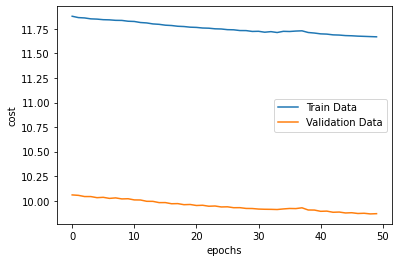

In [43]:
import matplotlib.pyplot as plt

plt.plot(cost_train[50:], label="Train Data")
plt.plot(cost_test[50:], label="Validation Data")
# print(np.max(current_percentage))
# plt.plot(current_percentage[:], label="Current Test")
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

## get correct percentage

In [47]:
def getCorrectPercentage(X, y):
  m = len(X)
  hatys, _ = L_model_forward(X, W, b)
  hatys = np.array([createY(np.argmax(y)) for y in hatys])
  corrent_num = np.sum(y * hatys)
  return corrent_num / m

print(getCorrectPercentage(X_train, y_train))
print(getCorrectPercentage(X_test, y_test))

0.8701166666666666
0.8742


[[0.1227092  0.0042099  0.40919356 0.20362559 0.00130365 0.08755694
  0.02970645 0.00111894 0.13839586 0.00217993]]
2


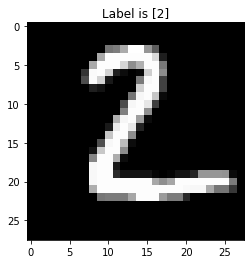

In [37]:
## Test
index = 1
single_label = np.where(y_test[index] == 1)[0]
single_Image = X_test[index].numpy()
single_Image_r = single_Image.reshape((28, 28))
test, _ = L_model_forward(single_Image, W, b)
print(test)
print(np.argmax(test))
plt.title('Label is {label}'.format(label=single_label))
plt.imshow(single_Image_r, cmap='gray')
plt.show()

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
hatys = []
for single_Image in test_data.values:
    haty, _ = L_model_forward(single_Image, W, b)
    hatys.append(np.argmax(haty))
    
hatys = pd.DataFrame(zip(range(1, len(hatys) + 1), hatys), columns=['ImageId', 'Label'])

<ipython-input-6-df679a0485eb>:2: RuntimeWarning: overflow encountered in exp
  return (np.exp(X)) / (np.sum(np.exp(X)))
<ipython-input-6-df679a0485eb>:2: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(X)) / (np.sum(np.exp(X)))


In [ ]:
hatys.to_csv('submission.csv', index=False)